In [1]:
import torch
from jetnet_dataloader import JetNetDataloader
from lit_nf import LitNF
from plotting import *
import pandas as pd
from jetnet.evaluation import w1p, w1efp, w1m, cov_mmd,fpnd
from jetnet.datasets import JetNet
from main import train

thx max
good boy


ImportError: cannot import name 'LitNF' from 'lit_nf' (/home/kaechben/JetNet_NF/LitJetNet/LitNF/lit_nf.py)

In [2]:
df=pd.read_csv("/beegfs/desy/user/kaechben/{}/summary.csv".format("t"))
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth',None)
df=pd.read_csv("/beegfs/desy/user/kaechben/{}/summary.csv".format("t"))
df.sort_values("val_fpnd")
# best_q=df.iloc[2,:]
df.sort_values("val_fpnd")
print(df[(df.context_features==2)&(df.calc_massloss==1)]["val_w1m"].std())
df[(df.context_features==2)&(df.calc_massloss==0)]["val_w1m"].std()



0.003983323681335949


0.028569938524122807

In [18]:
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth',None)
# for p in ["q","t","g"]:
#     df=pd.read_csv("/beegfs/desy/user/kaechben/{}/summary.csv".format(p))
# # top=df[df.time>0].sort_values("val_w1m")
# #     top=df.sort_values("val_w1m")
#     df[(df.context_features==0)&(df.calc_massloss==0)].sort_values("val_w1m").head(5).to_csv("top_c0_{}.csv".format(p))
#     df[(df.context_features==1)&(df.calc_massloss==0)].sort_values("val_w1m").head(5).to_csv("top_c1_{}.csv".format(p))
#     df[(df.context_features==2)&(df.calc_massloss==0)].sort_values("val_w1m").head(5).to_csv("top_c2_{}.csv".format(p))
#     df[(df.context_features==0)&(df.calc_massloss==1)].sort_values("val_w1m").head(5).to_csv("top_cc0_{}.csv".format(p))
#     df[(df.context_features==1)&(df.calc_massloss==1)].sort_values("val_w1m").head(5).to_csv("top_cc1_{}.csv".format(p))
#     df[(df.context_features==2)&(df.calc_massloss==1)].sort_values("val_w1m").head(5).to_csv("top_cc2_{}.csv".format(p))
# # best_run_1_t=/beegfs/desy/user/kaechben/t/2022_06_29-16_14-12/train_3/lightning_logs/version_1
# # best_run_2_t=/beegfs/desy/user/kaechben/t/2022_06_28-22_05-47/train_2/lightning_logs/version_0
# # best_run_1_q=/beegfs/desy/user/kaechben/q/2022_06_28-16_49-19/train_3/lightning_logs/version_0
# # best_run_2_q=/beegfs/desy/user/kaechben/q/2022_06_28-16_49-20/train_4/lightning_logs/version_0
# # best_run_1_g=/beegfs/desy/user/kaechben/g/2022_06_29-16_14-12/train_0/lightning_logs/version_0
# # best_run_2_g=/beegfs/desy/user/kaechben/q/2022_06_28-16_49-20/train_4/lightning_logs/version_0

In [ ]:
import matplotlib.pyplot as plt
import os
import hist
import mplhep as hep
import torch
import numpy as np
import hist
from hist import Hist
import traceback
from helpers import mass
import pandas as pd

from mpl_toolkits.axes_grid1 import make_axes_locatable
class plotting_paper():
    '''This is a class that takes care of  plotting steps in the script,
        It is initialized with the following arguments:
        true=the simulated data, note that it needs to be scaled
        gen= Generated data , needs to be scaled
        step=The current step of the training, this is need for tensorboard
        model=the model that is trained, a bit of an overkill as it is only used to access the losses
        config=the config used for training
        logger=The logger used for tensorboard logging'''
    def __init__(self,true,gen,config,step,typ,c,p,model=None,logger=None,weight=1):
        self.config=model.config
        self.n_dim=self.config["n_dim"]
        self.gen=gen
        self.test_set=true
        self.step=step
        self.model=model
        self.p=p
        self.typ=typ
        self.c=c
        self.weight=weight
        if logger is not None:
            self.summary=logger
    def plot_mass_only(self,m,m_t,bins=15):
        fig,ax=plt.subplots(2,1,gridspec_kw={'height_ratios': [3, 1]},figsize=(6,8))
        a=min(np.quantile(m_t,0.001),np.quantile(m,0.001))
        b=max(np.quantile(m_t,0.999),np.quantile(m,0.999))
        a=np.quantile(m_t,0.001)
        b=np.quantile(m_t,0.999)
        h=hist.Hist(hist.axis.Regular(bins,a,b))
        h2=hist.Hist(hist.axis.Regular(bins,a,b))
        bins = h.axes[0].edges
        h.fill(m)#,weight=1/self.weight)
        h2.fill(m_t)
            
            #hep.cms.label(data=False,lumi=None ,year=None,rlabel="",llabel="Private Work",ax=ax[0] )

        main_ax_artists, sublot_ax_arists = h.plot_ratio(
            h2,
            ax_dict={"main_ax":ax[0],"ratio_ax":ax[1]},
            rp_ylabel=r"Ratio",
            rp_num_label="Flow Generated",
            rp_denom_label="MC Simulatied",
            rp_uncert_draw_type="line",  # line or bar
        )
        ax[0].set_xlabel("")
#                 if quantile and v=="m" and plot_vline:
#                     ax[0,k].hist(m[m_t<np.quantile(m_t,0.1)],histtype='step',bins=bins,alpha=1,color="red",label="10% quantile gen",hatch="/")
#                     ax[0,k].vlines(np.quantile(m_t,0.1),0,np.max(h[:]),color="red",label='10% quantile train')

        ax[1].set_ylim(0.25,2)
        ax[0].set_xlim(a,b)
        ax[1].set_xlabel("$m_T$",fontweight="bold")
        ax[1].set_xlim(a,b)
        ax[0].set_ylabel("Counts",fontweight="bold" )
        ax[1].set_ylabel("Ratio",fontweight="bold")
  
     
#             print("added figure")
#             self.summary.close()

        plt.savefig("{}{}{}_mass".format(self.typ,self.c,self.p))
        plt.show()

    def plot_marginals(self,ith=None,save=False,title=None):
        #This plots the marginal distribution for simulation and generation
        #Note that this is the data the model sees during training as input to model in the NF
        #This is the distribution of one of [eta,phi,pt] of one particle of the n particles per jet: for example the pt of the 3rd particle
        #if save, the histograms are logged to tensorboard otherwise they are shown
        
        plt.switch_backend('agg')
        name,label=["eta","phi","pt"],['${\eta}^{rel}_{7}$',"${\phi}^{rel}_{7}$","${p_T}^{rel}_{7}$"]
        fig,ax=plt.subplots(2,3,gridspec_kw={'height_ratios': [3, 1]},figsize=(18,6))
        particles=range(self.n_dim) if not ith else [3*ith,3*ith+1,3*ith+2]
        plt.suptitle(title,fontweight="bold")
        k=0
        for i in particles:
            if ith:
                ax_temp=ax[:,k]
            else:
                fig,ax_temp=plt.subplots(2,1)
            a=np.quantile(self.test_set[:,i].numpy(),0)
            b=np.quantile(self.test_set[:,i].numpy(),1)

            h=hist.Hist(hist.axis.Regular(15,a,b,label=label[i%3],underflow=False,overflow=False))
            h2=hist.Hist(hist.axis.Regular(15,a,b,label=label[i%3],underflow=False,overflow=False))
            h.fill(self.gen[:,i].numpy())
            h2.fill(self.test_set[:,i].numpy())
            
            plt.tight_layout()
            #hep.cms.label(data=False,lumi=None ,year=None,rlabel="",llabel="Private Work",ax=ax[0,k] )
       
            main_ax_artists, sublot_ax_arists = h.plot_ratio(
                h2,
                ax_dict={"main_ax":ax_temp[0],"ratio_ax":ax_temp[1]},
                rp_ylabel=r"Ratio",
#                 rp_xlabel=label[i%3],
                rp_num_label="Flow Generated",
                rp_denom_label="MC Simulated",
                rp_uncert_draw_type="line",  # line or bar
            )
            
            
            ax_temp[0].set_xlabel("")
            ax_temp[1].set_ylim(0.25,2)
            ax_temp[0].set_xlim(a,b)
            ax_temp[1].set_xlim(a,b)
            ax_temp[1].set_xlabel(label[i%3])
            ax_temp[0].set_ylabel("Counts",fontweight="bold" )
            ax_temp[1].set_ylabel("Ratio",fontweight="bold")
            
            
            #plt.tight_layout(pad=2)
            k+=1
        if save:
            self.summary.add_figure("jet{}_{}".format(i//3+1,name[i%3]),fig,global_step=self.step)
            self.summary.close()
        else:
            plt.savefig("{}{}{}_7thpart".format(self.typ,self.c,self.p))
            plt.show()


    def plot_2d(self,save=False):
        #This creates a 2D histogram of the inclusive distribution for all 3 feature combinations
        #Inclusive means that is the distribution of pt of all particles per jet and sample
        #if save, the histograms are logged to tensorboard otherwise they are shown
        data=self.test_set[:,:self.n_dim].reshape(-1,3).numpy()
        gen=self.gen[:,:self.n_dim].reshape(-1,3).numpy()
        labels=[r"$\eta^{rel}$",r"$\phi^{rel}_7$",r"$p_T^{rel}$"]
        names=["eta","phi","pt"]
        for index in [[0,1],[0,2],[1,2]]:
            
            fig,ax=plt.subplots(ncols=2,figsize=(16, 8))
            _,x,y,_=ax[0].hist2d(data[:,index[0]],data[:,index[1]],bins=30)
            #rebin to only take 5% to 95.0% of signal dis
            a=np.quantile(x,0.05)
            b=np.quantile(x,0.95)
            x=np.linspace(a,b,len(x))
            a=np.quantile(y,0.05)
            b=np.quantile(y,0.95)
            y=np.linspace(a,b,len(y))
            if index[1]==2:
                y=np.abs(y)+0.00001
                y = np.logspace(np.log(y[0]),np.log(y[-1]),len(y))
            ax[0].hist2d(data[:,index[0]],data[:,index[1]],bins=[x,y])
            data[:,index[0]]=np.abs(data[:,index[0]])+0.00001
            ax[1].hist2d(gen[:,index[0]],gen[:,index[1]],bins=[x,y])
        
        
            plt.tight_layout(pad=2)
            ax[0].set_xlabel( labels[index[0]],fontweight="bold")
            ax[0].set_ylabel( labels[index[1]],fontweight="bold")
            
            ax[0].set_title("MC Simulated")
            ax[1].set_xlabel( labels[index[0]],fontweight="bold")
            ax[1].set_ylabel( labels[index[1]],fontweight="bold")
            
            ax[1].set_title("Flow Generated")
           
            if save:
                self.summary.add_figure("2d{}-{}".format(names[index[0]],names[index[1]]),fig,global_step=self.step)
                
                # self.summary.close()
            else:
                plt.savefig("{}{}{}_2dcorr{}{}".format(self.typ,self.c,self.p,names[index[0]],names[index[0]]))
                plt.show()
                
 
        
    def oversample(self,m,m_t,weight,save=False,quantile=False,bins=15,plot_vline=False,title=""):
        #This creates a histogram of the inclusive distributions and calculates the mass of each jet
        #and creates a histogram of that
        #if save, the histograms are logged to tensorboard otherwise they are shown
        #if quantile, this also creates a histogram of a subsample of the generated data, 
        # where the mass used to condition the flow is in the first 10% percentile of the simulated mass dist
        i=0
        k=0
        fig,ax=plt.subplots(2,4,gridspec_kw={'height_ratios': [3, 1]},figsize=(20,5))
        plt.suptitle(title,fontweight="bold")
        for v,name in zip(["eta","phi","pt","m"],[r"$\eta^{rel}$",r"$\phi^{rel}$",r"$p_T^{rel}$",r"$m^{rel}$"]):
            
            if v!="m":
                a=min(np.quantile(self.gen[:,i],0.001),np.quantile(self.test_set[:,i],0.001))
                b=max(np.quantile(self.gen[:,i],0.999),np.quantile(self.test_set[:,i],0.999))     
                
                h=hist.Hist(hist.axis.Regular(bins,a,b))
                h2=hist.Hist(hist.axis.Regular(bins,a,b))
                h.fill(self.gen[:,i],weight=1/weight)
                h2.fill(self.test_set[:,i])
                i+=1
            else:
                a=min(np.quantile(m_t,0.001),np.quantile(m,0.001))
                b=max(np.quantile(m_t,0.999),np.quantile(m,0.999))
                a=np.quantile(m_t,0.001)
                b=np.quantile(m_t,0.999)
                h=hist.Hist(hist.axis.Regular(bins,a,b))
                h2=hist.Hist(hist.axis.Regular(bins,a,b))
                bins = h.axes[0].edges
                h.fill(m,weight=1/weight)#,weight=1/self.weight)
                h2.fill(m_t)
            
            #hep.cms.label(data=False,lumi=None ,year=None,rlabel="",llabel="Private Work",ax=ax[0] )
            try:
                main_ax_artists, sublot_ax_arists = h.plot_ratio(
                    h2,
                    ax_dict={"main_ax":ax[0,k],"ratio_ax":ax[1,k]},
                    rp_ylabel=r"Ratio",
                    rp_num_label="Flow Generated",
                    rp_denom_label="MC Simulatied",
                    rp_uncert_draw_type="line",  # line or bar
                )
                ax[0,k].set_xlabel("")
#                 if quantile and v=="m" and plot_vline:
#                     ax[0,k].hist(m[m_t<np.quantile(m_t,0.1)],histtype='step',bins=bins,alpha=1,color="red",label="10% quantile gen",hatch="/")
#                     ax[0,k].vlines(np.quantile(m_t,0.1),0,np.max(h[:]),color="red",label='10% quantile train')
                    
                ax[1,k].set_ylim(0.25,2)
                ax[0,k].set_xlim(a,b)
                ax[1,k].set_xlabel(name,fontweight="bold")
                ax[1,k].set_xlim(a,b)
                ax[0,k].set_ylabel("Counts",fontweight="bold" )
                ax[1,k].set_ylabel("Ratio",fontweight="bold")
                
#                 if plot_vline:
#                        ax[0,k].legend(["Generated","Training","10% quantile Gen","10% quantile Sim"] )
#                 else:
#                       ax[0,k].legend(["Flow Generated","MC Simulated"] )
            except:
                print("mass plot failed reverting to simple plot mass bins")
                plt.close()
                plt.figure()
                _,b,_=plt.hist(m_t,15,label="MC Simulated",alpha=0.5)
                plt.hist(m,b,label="Flow Generated",alpha=0.5)
                plt.legend()  
            #hep.cms.label(data=False,lumi=None ,year=None,rlabel="",llabel="Private Work",ax=ax[0] )
            
#             plt.xlabel(name)
            plt.tight_layout(pad=1)
            k+=1
        if save:
            if v!="m":
                 self.summary.add_figure("inclusive"+v,fig,self.step)
            else:
                self.summary.add_figure("jet_mass",fig,self.step)
#             print("added figure")
#             self.summary.close()
        else:
            plt.savefig("{}{}{}_oversample_{}".format(self.typ,self.c,self.p,v))
            plt.show()

            
    def plot_mass(self,m,m_t,save=False,quantile=False,bins=15,plot_vline=False,title=""):
        #This creates a histogram of the inclusive distributions and calculates the mass of each jet
        #and creates a histogram of that
        #if save, the histograms are logged to tensorboard otherwise they are shown
        #if quantile, this also creates a histogram of a subsample of the generated data, 
        # where the mass used to condition the flow is in the first 10% percentile of the simulated mass dist
        i=0
        k=0
        fig,ax=plt.subplots(2,4,gridspec_kw={'height_ratios': [3, 1]},figsize=(20,5))
        plt.suptitle(title,fontweight="bold")
        for v,name in zip(["eta","phi","pt","m"],[r"$\eta^{rel}$",r"$\phi^{rel}$",r"$p_T^{rel}$",r"$m^{rel}$"]):
            
            if v!="m":
                a=min(np.quantile(self.gen[:,i],0.001),np.quantile(self.test_set[:,i],0.001))
                b=max(np.quantile(self.gen[:,i],0.999),np.quantile(self.test_set[:,i],0.999))     
                
                h=hist.Hist(hist.axis.Regular(bins,a,b))
                h2=hist.Hist(hist.axis.Regular(bins,a,b))
                h.fill(self.gen[:,i],weight=1/self.weight)
                h2.fill(self.test_set[:,i])
                i+=1
            else:
                a=min(np.quantile(m_t,0.001),np.quantile(m,0.001))
                b=max(np.quantile(m_t,0.999),np.quantile(m,0.999))
                a=np.quantile(m_t,0.001)
                b=np.quantile(m_t,0.999)
                h=hist.Hist(hist.axis.Regular(bins,a,b))
                h2=hist.Hist(hist.axis.Regular(bins,a,b))
                bins = h.axes[0].edges
                h.fill(m)#,weight=1/self.weight)
                h2.fill(m_t)
            
            #hep.cms.label(data=False,lumi=None ,year=None,rlabel="",llabel="Private Work",ax=ax[0] )
            try:
                main_ax_artists, sublot_ax_arists = h.plot_ratio(
                    h2,
                    ax_dict={"main_ax":ax[0,k],"ratio_ax":ax[1,k]},
                    rp_ylabel=r"Ratio",
                    rp_num_label="Flow Generated",
                    rp_denom_label="MC Simulatied",
                    rp_uncert_draw_type="line",  # line or bar
                )
                ax[0,k].set_xlabel("")
#                 if quantile and v=="m" and plot_vline:
#                     ax[0,k].hist(m[m_t<np.quantile(m_t,0.1)],histtype='step',bins=bins,alpha=1,color="red",label="10% quantile gen",hatch="/")
#                     ax[0,k].vlines(np.quantile(m_t,0.1),0,np.max(h[:]),color="red",label='10% quantile train')
                    
                ax[1,k].set_ylim(0.25,2)
                ax[0,k].set_xlim(a,b)
                ax[1,k].set_xlabel(name,fontweight="bold")
                ax[1,k].set_xlim(a,b)
                ax[0,k].set_ylabel("Counts",fontweight="bold" )
                ax[1,k].set_ylabel("Ratio",fontweight="bold")
                
#                 if plot_vline:
#                        ax[0,k].legend(["Generated","Training","10% quantile Gen","10% quantile Sim"] )
#                 else:
#                       ax[0,k].legend(["Flow Generated","MC Simulated"] )
            except:
                print("mass plot failed reverting to simple plot mass bins")
                plt.close()
                plt.figure()
                _,b,_=plt.hist(m_t,15,label="MC Simulated",alpha=0.5)
                plt.hist(m,b,label="Flow Generated",alpha=0.5)
                plt.legend()  
            #hep.cms.label(data=False,lumi=None ,year=None,rlabel="",llabel="Private Work",ax=ax[0] )
            
#             plt.xlabel(name)
            plt.tight_layout(pad=1)
            k+=1
        if save:
            if v!="m":
                 self.summary.add_figure("inclusive"+v,fig,self.step)
            else:
                self.summary.add_figure("jet_mass",fig,self.step)
#             print("added figure")
#             self.summary.close()
        else:
            plt.savefig("{}{}{}_inclusive_{}".format(self.typ,self.c,self.p,v))
            plt.show()


    def losses(self,save=False):
        '''This plots the different losses vs epochs'''
        fig=plt.figure()
        hep.cms.label("Private Work",data=None,lumi=None,year=None)
        plt.xlabel('step')
        plt.ylabel('loss')
        ln1=plt.plot(self.model.logprobs,label='log$(p_{gauss}(x_{data}))$')
        if "calc_massloss" in self.config.keys() and self.config["calc_massloss"]:
            plt.twinx()
            ln2=plt.plot(self.model.mlosses,label=r'mass mse $\times$ {}'.format(self.config["lambda"]),color='orange')
            plt.ylabel("MSE")
            plt.yscale("log")
            ln1+=ln2
        labs=[l.get_label() for l in ln1]
        plt.legend(ln1,labs)
        plt.tight_layout(pad=2)
        if save:
            self.summary.add_figure("losses",fig,self.step)
#             self.summary.close()
        else:
            plt.show()
   

    def plot_correlations(self,save=True):
        #Plots correlations between all particles for i=0 eta,i=1 phi,i=2 pt
        self.plot_corr(i=0,save=save)
        self.plot_corr(i=1,save=save)
        self.plot_corr(i=2,save=save)

    def plot_corr(self,i=0,names=["$\eta^{rel}$","$\phi^{rel}$","$p_T$"],save=True):
        if i==2:
            c=1
        else:
            c=0.3
        df_g=pd.DataFrame(self.gen[:,:self.n_dim].detach().numpy()[:,range(i,90,3)])
        df_h=pd.DataFrame(self.test_set[:,:self.n_dim].detach().numpy()[:,range(i,90,3)])
        fig,ax=plt.subplots(ncols=2,figsize=(20,10))
        corr_g = ax[0].matshow(df_g.corr())
        corr_g.set_clim(-c,c)
        divider = make_axes_locatable(ax[0])
        cax = divider.append_axes('right', size='5%', pad=0.05)
        cbar=fig.colorbar(corr_g,cax=cax)
        corr_h = ax[1].matshow(df_h.corr())
        corr_h.set_clim(-c,c)
        divider = make_axes_locatable(ax[1])
        cax2 = divider.append_axes('right', size='5%', pad=0.05)
        cbar=fig.colorbar(corr_h,cax=cax2)
        plt.suptitle("{} Correlation between Particles".format(names[i]),fontweight="bold")
        ax[0].set_title("Flow Generated",fontweight="bold")
        ax[1].set_title("MC Simulated",fontweight="bold")
        ax[0].set_xlabel("Particles",fontweight="bold")
        ax[0].set_ylabel("Particles",fontweight="bold")
        ax[1].set_xlabel("Particles",fontweight="bold")
        ax[1].set_ylabel("Particles",fontweight="bold")
        title=["corr_eta","corr_phi","corr_pt"]
        if save:
                
                self.summary.add_figure(title[i],fig,self.step)    
    #             self.summary.close()
        else:
                plt.savefig("{}{}{}_{}".format(self.typ,self.c,self.p,title[i]))
                plt.show()

    def var_part(self,true,gen,true_n,gen_n,m_true,m_gen,form=2,save=True):
        labels=["$\eta^{rel}$","$\phi^{rel}$","$p^{rel}_T$","$m^{rel}$"]
        names=["eta","phi","pt","m"]
        n,counts=torch.unique(true_n,return_counts=True)
        for j in range(4):
            fig,ax=plt.subplots(ncols=2,nrows=2,figsize=(15,15))

            k=-1
            ntemp=n[-form**2:]

            
            for i in list(ntemp)[::-1]: 
                k+=1
                i=int(i)

                if names[j]!="m":
                    a=np.quantile(self.test_set[true_n.reshape(-1)==i,:].reshape(-1,3)[:,j],0.001)
                    b=np.quantile(self.test_set[true_n.reshape(-1)==i,:].reshape(-1,3)[:,j],0.999)    
                    h=hist.Hist(hist.axis.Regular(15,a,b))
                    h2=hist.Hist(hist.axis.Regular(15,a,b))
                    bins = h.axes[0].edges

                    ax[k//form,k%form].legend()
                    h.fill(self.gen[gen_n.reshape(-1)==i,:].reshape(-1,3)[:,j])
                    h2.fill(self.test_set[true_n.reshape(-1)==i,:].reshape(-1,3)[:,j])
                    
                else:
                    a=np.quantile(m_true[true_n.reshape(-1)==i],0.001)
                    b=np.quantile(m_gen[gen_n.reshape(-1)==i],0.999)
  
                    h=hist.Hist(hist.axis.Regular(15,a,b,label=labels[j]))
                    h2=hist.Hist(hist.axis.Regular(15,a,b,label=labels[j]))
                    bins = h.axes[0].edges
                    h.fill(m_gen[gen_n.reshape(-1)==i])
                    h2.fill(m_true[true_n.reshape(-1)==i])
                    

                h.plot1d(    ax=ax[k//2,k%2],label="Flow Simulated")  # line or bar)
                h2.plot1d(    ax=ax[k//2,k%2],label="MC Generated")  # line or bar)
                ax[k//2,k%2].set_title("{} Distribution for jets with {} particles".format(labels[j],i))

                ax[k//2,k%2].set_xlabel(labels[j])
                ax[k//2,k%2].set_ylabel("Counts",fontweight="bold")
                ax[k//2,k%2].set_xlim(a,b)
                ax[k//2,k%2].legend()
                #plt.tight_layout(pad=2)

            if save:
                self.summary.add_figure("jet{}_{}".format(i//3+1,names[i%3]),fig,global_step=self.step)
                self.summary.close()
            else:
                plt.savefig("{}{}{}jet{}_{}".format(self.typ,self.c,self.p,i//3+1,names[j]))
                plt.show()

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth',None)
print(os.listdir("/beegfs/desy/user/kaechben/bestmodels_final/top_cc1_t/lightning_logs/"))
ckpts=os.listdir("/beegfs/desy/user/kaechben/bestmodels_final/top_cc1_t/lightning_logs/version_1/checkpoints")
print(ckpts)
ckpt_df=pd.DataFrame(ckpts,columns=["path"])
ckpt_df["w1m"]=ckpt_df["path"].str.split("w1m=").str[1]
ckpt_df["w1m"]=ckpt_df["w1m"].str.split("-").str[0]
ckpt_df["w1efp"]=ckpt_df["path"].str.split("w1efp=").str[1]
ckpt_df["w1efp"]=ckpt_df["w1efp"].str.split("-").str[0]
ckpt_df["fpnd"]=ckpt_df["path"].str.split("fpnd=").str[1]
ckpt_df["fpnd"]=ckpt_df["fpnd"].str.split(".ck").str[0]


top_c2_t="epoch=4399-val_logprob=0.51-val_w1m=0.0007-val_w1efp=0.000030-val_fpnd=2.12.ckpt"
top_c1_t="epoch=4299-val_logprob=0.55-val_w1m=0.0015-val_w1efp=0.000030-val_fpnd=2.52.ckpt"
top_cc1_t="epoch=199-val_logprob=0.48-val_w1m=0.0010-val_w1efp=0.000054-val_fpnd=5.96.ckpt"
top_cc2_t="/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/epoch=1999-val_logprob=0.66-val_w1m=0.0012-val_w1efp=0.000043-val_fpnd=2.29.ckpt"
top_c1_q="epoch=3199-val_logprob=0.01-val_w1m=0.0013-val_w1efp=0.000009-val_fpnd=0.44.ckpt"
top_c2_q="epoch=3099-val_logprob=-0.04-val_w1m=0.0008-val_w1efp=0.000007-val_fpnd=0.62.ckpt"
top_cc1_q="epoch=2599-val_logprob=0.11-val_w1m=0.0008-val_w1efp=0.000007-val_fpnd=0.53.ckpt"
top_cc2_q="epoch=1699-val_logprob=-0.09-val_w1m=0.0007-val_w1efp=0.000009-val_fpnd=1.11.ckpt"
top_cc2_g="epoch=4099-val_logprob=0.40-val_w1m=0.0006-val_w1efp=0.000010-val_fpnd=0.53.ckpt"
top_cc1_g="epoch=4499-val_logprob=0.40-val_w1m=0.0007-val_w1efp=0.000013-val_fpnd=0.92.ckpt"
top_c1_g="epoch=4399-val_logprob=0.42-val_w1m=0.0008-val_w1efp=0.000010-val_fpnd=0.52.ckpt"
top_c2_g="epoch=4499-val_logprob=0.48-val_w1m=0.0011-val_w1efp=0.000011-val_fpnd=0.32.ckpt"
top_c0_g="epoch=1099-val_logprob=0.39-val_w1m=0.0045-val_w1efp=0.000037-val_fpnd=1.71.ckpt"
top_c0_t="epoch=1799-val_logprob=0.46-val_w1m=0.0062-val_w1efp=0.000146-val_fpnd=7.59.ckpt"
top_c0_q="epoch=499-val_logprob=-0.10-val_w1m=0.0023-val_w1efp=0.000019-val_fpnd=1.19.ckpt"
ckpt_df.sort_values("fpnd")

['version_1', 'version_0']
['epoch=499-val_logprob=0.83-val_w1m=0.0006-val_w1efp=0.000071-val_fpnd=8.03.ckpt', 'epoch=1399-val_logprob=1.44-val_w1m=0.0007-val_w1efp=0.000085-val_fpnd=8.18.ckpt', 'epoch=1799-val_logprob=1.70-val_w1m=0.0008-val_w1efp=0.000076-val_fpnd=9.84.ckpt', 'epoch=199-val_logprob=0.48-val_w1m=0.0010-val_w1efp=0.000054-val_fpnd=5.96.ckpt', 'epoch=1699-val_logprob=1.85-val_w1m=0.0010-val_w1efp=0.000079-val_fpnd=10.72.ckpt', 'epoch=999-val_logprob=1.16-val_w1m=0.0012-val_w1efp=0.000088-val_fpnd=7.30.ckpt', 'epoch=699-val_logprob=0.98-val_w1m=0.0007-val_w1efp=0.000083-val_fpnd=8.68.ckpt', 'epoch=299-val_logprob=0.52-val_w1m=0.0008-val_w1efp=0.000053-val_fpnd=6.88.ckpt', 'epoch=799-val_logprob=1.04-val_w1m=0.0007-val_w1efp=0.000070-val_fpnd=7.89.ckpt', 'epoch=2099-val_logprob=1.70-val_w1m=0.0010-val_w1efp=0.000073-val_fpnd=9.79.ckpt', 'epoch=1599-val_logprob=1.53-val_w1m=0.0005-val_w1efp=0.000081-val_fpnd=8.60.ckpt', 'epoch=899-val_logprob=1.13-val_w1m=0.0008-val_w1efp=

,path,w1m,w1efp,fpnd
4,epoch=1699-val_logprob=1.85-val_w1m=0.0010-val_w1efp=0.000079-val_fpnd=10.72.ckpt,0.0010,0.000079,10.72
21,epoch=1899-val_logprob=2.06-val_w1m=0.0010-val_w1efp=0.000088-val_fpnd=11.81.ckpt,0.0010,0.000088,11.81
15,epoch=2199-val_logprob=2.29-val_w1m=0.0019-val_w1efp=0.000083-val_fpnd=12.07.ckpt,0.0019,0.000083,12.07
3,epoch=199-val_logprob=0.48-val_w1m=0.0010-val_w1efp=0.000054-val_fpnd=5.96.ckpt,0.0010,0.000054,5.96
7,epoch=299-val_logprob=0.52-val_w1m=0.0008-val_w1efp=0.000053-val_fpnd=6.88.ckpt,0.0008,0.000053,6.88
5,epoch=999-val_logprob=1.16-val_w1m=0.0012-val_w1efp=0.000088-val_fpnd=7.30.ckpt,0.0012,0.000088,7.30
19,epoch=99-val_logprob=0.52-val_w1m=0.0011-val_w1efp=0.000113-val_fpnd=7.47.ckpt,0.0011,0.000113,7.47
8,epoch=799-val_logprob=1.04-val_w1m=0.0007-val_w1efp=0.000070-val_fpnd=7.89.ckpt,0.0007,0.000070,7.89
0,epoch=499-val_logprob=0.83-val_w1m=0.0006-val_w1efp=0.000071-val_fpnd=8.03.ckpt,0.0006,0.000071,8.03
20,epoch=1299-val_logprob=1.40-val_w1m=0.0007-val_w1efp=0.000084-val_fpnd=8.12.ckpt,0.0007,0.000084,8.12


In [4]:
import yaml
root="/beegfs/desy/user/kaechben/bestmodels_final/"
checkpoint_dict={"c0g":[],"c1g":[],"c2g":[],"cc2g":[],"cc1g":[],"c0t":[],"c1t":[],"c2t":[],"cc2t":[],"cc1t":[],"c0q":[],"c1q":[],"c2q":[],"cc2q":[],"cc1q":[]}
for i in os.listdir(root):
    if i.find("csv")>0:
        continue
    

    for k in range(11):
        temp=root+i+"/lightning_logs/version_{}/checkpoints/".format(k)
        try:
            files=os.listdir(temp)
        except:
#             traceback.print_exc()
            continue

        if top_c0_g in files:
            checkpoint_dict["c0g"]=temp+top_c0_g            
        if top_c1_g in files:
            checkpoint_dict["c1g"]=temp+top_c1_g
        if top_c2_g in files:
            checkpoint_dict["c2g"]=temp+top_c2_g
        if top_cc2_g in files:
            checkpoint_dict["cc2g"]=temp+top_cc2_g
        if top_cc1_g in files:
            checkpoint_dict["cc1g"]=temp+top_cc1_g
        if top_c0_q in files:
            checkpoint_dict["c0q"]=temp+top_c0_q            
        if top_c1_q in files:
            checkpoint_dict["c1q"]=temp+top_c1_q
        if top_c2_q in files:
            checkpoint_dict["c2q"]=temp+top_c2_q
        if top_cc2_q in files:
            checkpoint_dict["cc2q"]=temp+top_cc2_q
        if top_cc1_q in files:
            checkpoint_dict["cc1q"]=temp+top_cc1_q


        if top_c0_t in files:
            checkpoint_dict["c0t"]=temp+top_c0_t            
        if top_c1_t in files:
            checkpoint_dict["c1t"]=temp+top_c1_t
        if top_c2_t in files:
            checkpoint_dict["c2t"]=temp+top_c2_t
        if top_cc2_t in files:
            checkpoint_dict["cc2t"]=temp+top_cc2_t
        if top_cc1_t in files:
            checkpoint_dict["cc1t"]=temp+top_cc1_t
        

checkpoint_dict["cc2t"]="/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/epoch=1999-val_logprob=0.66-val_w1m=0.0012-val_w1efp=0.000043-val_fpnd=2.29.ckpt"
checkpoint_dict["cc2g"]
os.listdir("/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/lightning_logs/version_9")
with open("/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/lightning_logs/version_12/hparams.yaml", 'r') as stream:
    config=yaml.safe_load(stream)
config

{'network_layers': 5,
 'network_nodes': 113,
 'batch_size': 10000,
 'coupling_layers': 16,
 'lr': 0.0004083543938546,
 'batchnorm': True,
 'bins': 5,
 'tail_bound': 3,
 'limit': 150000,
 'n_dim': 90,
 'dropout': 0.1713138369955015,
 'lr_schedule': False,
 'n_sched': 1000.0,
 'canonical': False,
 'max_steps': 50000,
 'lambda': 59.21244778829019,
 'n_mse_turnoff': 1000000,
 'n_mse_delay': 5,
 'name': 't',
 'disc': False,
 'calc_massloss': True,
 'context_features': 2,
 'variable': 1.0,
 'spline': True,
 'parton': 't',
 'oversampling': False,
 'config': {'network_layers': 5,
  'network_nodes': 113,
  'batch_size': 10000,
  'coupling_layers': 16,
  'lr': 0.0004083543938546,
  'batchnorm': True,
  'bins': 5,
  'tail_bound': 3,
  'limit': 150000,
  'n_dim': 90,
  'dropout': 0.1713138369955015,
  'lr_schedule': False,
  'n_sched': 1000.0,
  'canonical': False,
  'max_steps': 50000,
  'lambda': 59.21244778829019,
  'n_mse_turnoff': 1000000,
  'n_mse_delay': 5,
  'name': 't',
  'disc': False,
 

In [5]:
# #best_run_1_t="/beegfs/desy/user/kaechben/t/2022_06_29-16_14-12/train_3/lightning_logs/version_1"
# cc_t="/beegfs/desy/user/kaechben/t/2022_06_29-16_14-12/train_3/lightning_logs/version_1"
# model_cc_t=cc_t+"/../../epoch=359-val_logprob=0.49-val_w1m=0.0005.ckpt"#"/beegfs/desy/user/kaechben/t/2022_06_28-22_05-47/train_2/lightning_logs/version_0"
# # best_run_1_q="/beegfs/desy/user/kaechben/q/2022_06_28-16_49-19/train_3/lightning_logs/version_0"
# cc_q="/beegfs/desy/user/kaechben/q/2022_06_28-16_49-19/train_3/lightning_logs/version_0"
# model_cc_q=cc_q+"/../..epoch=219-val_logprob=0.05-val_w1m=0.0010.ckpt"
# c_q="/beegfs/desy/user/kaechben/q/2022_06_30-18_22-44/train_0/lightning_logs/version_0"
# model_c_q=c_q+"/../../epoch=419-val_logprob=-0.10-val_w1m=0.0005.ckpt"
# # best_run_2_q="/beegfs/desy/user/kaechben/q/2022_06_28-16_49-20/train_4/lightning_logs/version_0"
# best_run_1_g="/beegfs/desy/user/kaechben/g/2022_06_29-16_14-12/train_3/lightning_logs/version_5"
# best_run_2_g="/beegfs/desy/user/kaechben/g/2022_06_29-16_14-12/train_1/lightning_logs/version_2"
from plotting import *
results_sum=pd.DataFrame()
# checkpoint_dict={}
# checkpoint_dict["cc2t"]="/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/epoch=1999-val_logprob=0.66-val_w1m=0.0012-val_w1efp=0.000043-val_fpnd=2.29.ckpt"

for typ in ["c","cc"]:
    for p in ["t"]:
        for c in [1,2]:
            if typ=="cc" and c==0:
                continue
            
#             df=pd.read_csv("/beegfs/desy/user/kaechben/bestmodels_final/top_{}{}_{}.csv".format(typ,c,p)).set_index("path_index")
#             row=df.iloc[0,:]
            import yaml
            try:
                if not typ+str(c)+p=="cc2t":
                    with open("/".join(checkpoint_dict[typ+str(c)+p].split("/")[:-2])+"/hparams.yaml", 'r') as stream:
                        config=yaml.safe_load(stream)
                else:
                    with open("/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/lightning_logs/version_12/hparams.yaml", 'r') as stream:
                        config=yaml.safe_load(stream)
            except:
                print(typ,c,p)
                continue
            config["n_pa
#             config = {
#                    "network_layers": row["network_layers"].astype(int),  # sets amount hidden layers in transformation networks -scannable
#                     "network_nodes":row["network_nodes"].astype(int) ,
#                     "batch_size":row["batch_size"].astype(int) ,
#                     "coupling_layers":row["coupling_layers"].astype(int),
#                     "lr":row["lr"] ,
#                     "batchnorm":row["batchnorm"],
#                     "bins":row["bins"].astype(int) , 
#                     "tail_bound":row["tail_bound"].astype(int) ,
#                     "limit": row["limit"].astype(int),  # how many data points to use, test_set is 10% of this -scannable in a sense use 10 k for faster training
#                     "n_dim":row["n_dim"].astype(int)  ,
#                     "dropout":row["dropout"],
#                     "lr_schedule":row["lr_schedule"] ,
#                     "n_sched":row["n_sched"] ,
#                     "canonical":row["canonical"],
#                     "max_steps":-1,#row["max_steps"].astype(int)  ,
#                     "lambda":row["lambda"] ,
#                     "n_mse_turnoff":row["n_mse_turnoff"].astype(int)  ,
#                     "n_mse_delay":row["n_mse_delay"].astype(int) ,
#                     "name":row["name"] ,
#                     "disc":row["disc"] ,
#                     "calc_massloss":row["calc_massloss"],
#                     "context_features":row["context_features"].astype(int) ,
#                     "variable":row["variable"],
#                     "spline":row["spline"],
#                     "parton":"t",
#                     "oversampling":row["oversampling"],
#                     "batch_size":int(row["batch_size"]) ,
#                 }
            data_module = JetNetDataloader(config) #this loads the data
            model = LitNF(config,hyperopt=False) # the sets up the model,  config are hparams we want to optimize
            model.data_module=data_module              
            
            # model.config = config #config are our hyperparams, we make this a class property now]
            
            model=model.load_from_checkpoint(checkpoint_dict["{}{}{}".format(typ,c,p)])
            model=model.eval()
            
            
            data_module.setup("validation")
            batch=data_module.test_set.to("cpu")
            n_true=batch[:,-1]
#           
            model.load_datamodule(data_module)#adds datamodule to model
            c_test,n_test=model.test_cond(len(batch)) #this is the condition in the case of testing
            with torch.no_grad():
                try:
                    test=model.flow_test.to("cpu").sample(1 ,c_test.to("cpu")).to("cpu").reshape(-1,90)
                except:
                    test=model.flow_test.to("cpu").sample(len(batch)).to("cpu").reshape(-1,90)
                test=torch.hstack((test[:,:model.n_dim].cpu().detach().reshape(-1,model.n_dim),torch.ones(len(test)).unsqueeze(1)))
            # Reverse Standard Scaling (this has nothing to do with flows, it is a standard preprocessing step)
            test=model.data_module.scaler.inverse_transform(test)
            true=model.data_module.scaler.inverse_transform(batch[:,:model.n_dim+1])[:,:model.n_dim]
            #We overwrite in cases where n is smaller 30 the particles after n with 0
            if model.config["context_features"]>1:
                for i in torch.unique(c_test[:,-1]):
                    i=int(i)
                    test[c_test[:,-1]==i,3*i:-1]=0
            #This is just a nice check to see whether we overtrain 
#             logprob = -model.flow.to("cpu").log_prob(batch[:,:model.n_dim],c).detach().mean().numpy()/model.n_dim
            m_t=mass(true[:,:model.n_dim].to(model.device),model.config["canonical"]).cpu()
            m_test=mass(test[:,:model.n_dim],model.config["canonical"]).cpu()
            test=torch.column_stack((test[:,:90],m_test))       
            # For one metric the pt needs to always be bigger or equal 0, so we overwrite the cases where it isnt (its not physical possible to ahve pt smaller 0)
            for i in range(30):
                i=2+3*i
                test[test[:,i]<0,i]=0
                true[true[:,i]<0,i]=0
            cov,mmd=cov_mmd(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3),use_tqdm=False)
            try:
                fpndv=fpnd(test[:50000,:model.n_dim].reshape(-1,model.n_dim//3,3).numpy(),use_tqdm=False,jet_type=model.config["parton"],device="cuda", batch_size=25)
            except:
                fpndv=1000
            tempm=w1m(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3))
            tempp=w1p(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3))
            tempe=w1efp(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3),)
            results=pd.DataFrame([tempm[0],tempp[0],tempe[0],fpndv,cov,mmd,tempm[1],tempp[1],tempe[1]])
            results=results.T
            results.columns=["val_w1m","val_w1p","val_w1efp","fpnd","cov","mmd","pmm","pmp","pme"]
            results["model"]=typ+str(c)+p
            results_sum=results_sum.append(results)
            print(results_sum)
            plot=plotting_paper(model=model,gen=test[:,:model.n_dim],true=true[:,:model.n_dim],config=model.config,step=model.global_step,typ=typ,c=c,p=p,logger=None)
            plot.plot_marginals(ith=7,save=False,title="Marginal Distributions, {} Dataset".format("Top-Quark" if p=="t" else "Gluon" if p=="g" else "Light-Quark"))
            plot.plot_mass(m_test.cpu().numpy(),m_t.cpu().numpy(),save=False,bins=15,quantile=False,title="Inclusive Distributions, top-quark Dataset")
            plot.var_part(true=true[:,:model.n_dim],gen=test[:,:model.n_dim],true_n=n_true,gen_n=n_test,m_true=m_t,m_gen=m_test ,save=False)
            plot.plot_corr(i=0,save=False)
            plot.plot_corr(i=1,save=False)            
            plot.plot_corr(i=2,save=False)     
            plot.plot_mass_only(m_test.cpu().numpy(),m_t.cpu().numpy())

KeyError: 'n_part'

In [20]:
qcc2='/beegfs/desy/user/kaechben/bestmodels/top_cc2_q/epoch=2399-val_logprob=-0.24-val_w1m=0.0010-val_w1efp=0.000007-val_fpnd=0.96.ckpt'
qc0='/beegfs/desy/user/kaechben/bestmodels/top_cc0_q/epoch=1699-val_logprob=-0.08-val_w1m=0.0044-val_w1efp=0.000032-val_fpnd=3.94.ckpt'
qc1='/beegfs/desy/user/kaechben/bestmodels/top_c1_q/epoch=1199-val_logprob=-0.18-val_w1m=0.0008-val_w1efp=0.000006-val_fpnd=0.71.ckpt'
tc0='/beegfs/desy/user/kaechben/bestmodels/top_c0_t/epoch=999-val_logprob=0.45-val_w1m=0.0059-val_w1efp=0.000116-val_fpnd=6.32.ckpt'
tc1="/beegfs/desy/user/kaechben/bestmodels/top_c1_t/epoch=2299-val_logprob=0.49-val_w1m=0.0010-val_w1efp=0.000033-val_fpnd=2.95.ckpt"
tcc2='/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/epoch=2199-val_logprob=0.43-val_w1m=0.0008-val_w1efp=0.000046-val_fpnd=3.30.ckpt'
gc0="/beegfs/desy/user/kaechben/bestmodels/top_c0_g/epoch=999-val_logprob=0.39-val_w1m=0.0045-val_w1efp=0.000035-val_fpnd=1.57.ckpt"
gc1='/beegfs/desy/user/kaechben/bestmodels/top_c1_g/epoch=1699-val_logprob=0.48-val_w1m=0.0005-val_w1efp=0.000008-val_fpnd=0.43.ckpt'
gcc2='/beegfs/desy/user/kaechben/bestmodels/top_cc2_g/epoch=1299-val_logprob=0.41-val_w1m=0.0008-val_w1efp=0.000007-val_fpnd=0.35.ckpt'

# investigating_top='lightning_logs/version_56/checkpoints/epoch=2799-val_logprob=0.53-val_w1m=0.0008-val_w1efp=0.000036-val_fpnd=2.22.ckpt'

# if True:#load_ckpt:
#      model = model.load_from_checkpoint(investigating_top)


45648


/beegfs/desy/user/kaechben/.conda/envs/jetnet/lib/python3.8/site-packages/jetnet/evaluation/gen_metrics.py:239: RuntimeWarning: Recommended number of jets for FPND calculation is 50000
  warnings.warn(
/tmp/ipykernel_19868/64958973.py:65: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sum=results_sum.append(results)
/tmp/ipykernel_19868/64958973.py:66: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  results_sum.to_latex(index=False)


'\\begin{tabular}{rrrrrrrrr}\n\\toprule\n val\\_w1m &  val\\_w1p &  val\\_w1efp &     fpnd &   cov &      mmd &      pmm &      pmp &      pme \\\\\n\\midrule\n0.000694 &  0.00166 &   0.000036 & 2.175339 & 0.578 & 0.069928 & 0.000158 & 0.000429 & 0.000026 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [130]:
df=results_sum.copy()
index=["MP-MP-g","MPLFC-MP-g","c0g","c1g","c2g","cc1g","cc2g","MP-MP-q","MPLFC-MP-q","c0q","c1q","c2q","cc1q","cc2q","MP-MP-t","MPLFC-MP-t","c0t","c1t","c2t","cc1t","cc2t"]
print_table.columns

Index(['model', '$W_1^M (\times 10^{-3})$', '$W_1^P (\times 10^{-3})$',
       '$W_1^{EFP}(\times 10^{-5})$', 'FPND', 'COV $\uparrow$', 'MMD'],
      dtype='object')

In [242]:
def format_mean_sd(mean, sd):
    """round mean and standard deviation to most significant digit of sd and apply latex formatting"""
    decimals = -int(np.floor(np.log10(sd)))
    decimals -= int((sd * 10 ** decimals) >= 9.5)

    if decimals < 0:
        ten_to = 10 ** (-decimals)
        if mean > ten_to:
            mean = ten_to * (mean // ten_to)
        else:
            mean_ten_to = 10 ** np.floor(np.log10(mean))
            mean = mean_ten_to * (mean // mean_ten_to)
        sd = ten_to * (sd // ten_to)
        decimals = 0

    if mean >= 1e3 and sd >= 1e3:
        mean = np.round(mean * 1e-3)
        sd = np.round(sd * 1e-3)
        return f"${mean:.{decimals}f}$k $\\pm {sd:.{decimals}f}$k"
    else:
        return f"${mean:.{decimals}f} \\pm {sd:.{decimals}f}$"
print_table=results_sum.copy().set_index("model",drop=False)

print_table.loc[:,"val_w1m"]*=1000
print_table.loc[:,"val_w1p"]*=1000
print_table.loc[:,"val_w1efp"]*=100000
print_table.loc[:,"pmm"]*=1000
print_table.loc[:,"pmp"]*=1000
print_table.loc[:,"pme"]*=100000
print_table.loc["MP-MP-g",:]=np.array([0.7,0.9,0.7,0.12,0.56,0.037,0.2,0.3,0.7,"MP-MP"])

print_table.loc["MPLFC-MP-g",:]=np.array([0.69,1.8,0.9,0.2,0.54,0.037,.07,.3,.2,"MP_LFC-MP"])
print_table.loc["MP-MP-q",:]=np.array([0.6,4.9,0.7,0.35,0.50,0.026,.2,.5,.4,"MP-MP"])

print_table.loc["MPLFC-MP-q",:]=np.array([0.7,2.6,0.9,0.08,0.52,0.037,.2,.4,.9,"MP_LFC-MP"])


print_table.loc["MP-MP-t",:]=np.array([0.6,2.3,2,0.37,0.57,0.071,.2,.3,1,"MP-MP"])
print_table.loc["MPLFC-MP-t",:]=np.array([0.9,2.2,2,0.93,0.56,0.073,.3,.7,1,"MP_LFC-MP"])
print_table.loc[:,"val_w1m"]=print_table.apply(lambda x:format_mean_sd(float(x["val_w1m"]),float(x["pmm"])),axis=1)
print_table.loc[:,"val_w1efp"]=print_table.apply(lambda x:format_mean_sd(float(x["val_w1efp"]),float(x["pme"])),axis=1)
print_table.loc[:,"val_w1p"]=print_table.apply(lambda x:format_mean_sd(float(x["val_w1p"]),float(x["pmp"])),axis=1)


print_table.loc[:,"cov"]=print_table.loc[:,"cov"].astype(float).map('{:.2f}'.format)
print_table.loc[:,"fpnd"]=print_table.loc[:,"fpnd"].astype(float).map('{:.2f}'.format)
print_table.loc[:,"mmd"]=print_table.loc[:,"mmd"].astype(float).map('{:.3f}'.format)

print_table.loc[:,"pmm"]=print_table.loc[:,"pmm"].astype(float).map('{:,.2f}'.format)

print_table.loc[:,"pmp"]=print_table.loc[:,"pmp"].astype(float).map('{:,.2f}'.format)

print_table.loc[:,"pme"]=print_table.loc[:,"pme"].astype(float).map('{:,.2f}'.format)
print_table.loc[:,"parton"]=print_table.index.str[-1]
# print_table.loc[:,"val_w1m"]="$"+print_table["val_w1m"].map(str)+"\pm"+print_table["pmm"].map(str)+"$"
# print_table.loc[:,"val_w1p"]="$"+print_table["val_w1p"].map(str)+"\pm"+print_table["pmp"].map(str)+"$"
# print_table.loc[:,"val_w1efp"]="$"+print_table["val_w1efp"].map(str)+"\pm"+print_table["pme"].map(str)+"$"
print_table.loc[:,"cov"]="$"+print_table["cov"].map(str)+"$"
print_table.loc[:,"fpnd"]="$"+print_table["fpnd"].map(str)+"$"
print_table.loc[:,"mmd"]="$"+print_table["mmd"].map(str)+"$"

print_table.loc[:,"model"]=print_table["model"].str.replace("c0","VNF").str.replace("cc","NFCC").str.replace("c","NFC").str.replace("1","\ (m)").str.replace("2","\ (m,n)").str.replace("q","").str.replace("g","").str.replace("t","")

print_table=print_table.loc[index,:]

final_table=pd.DataFrame()
tex=""
for p in ["g","q","t"]:
    temp=print_table[print_table["parton"]==p]

    for col in print_table.drop("model",axis=1).columns:
        
        if col not in ["val_w1m","val_w1p","val_w1efp","fpnd","cov","mmd" ]:
            continue
        
        temp_index=temp[col].str.replace("$","").str.split("\\").str[0].astype(float)
        mins=temp_index==temp_index.min() if col!="cov" else temp_index==temp_index.max()
        temp.loc[mins,col]="$\mathbf{"+temp.loc[mins,col].astype(str).str.replace("$","")+"}$"
    temp=temp[["model","val_w1m","val_w1p","val_w1efp","fpnd","cov","mmd"]]
    temp.columns=["model","$W_1^M (\times 10^{-3})$","$W_1^P (\times 10^{-3})$","$W_1^{EFP}(\times 10^{-5})$","FPND",r"COV $\uparrow$","MMD"]
    text=temp.to_latex(index=False,escape=False)
    parton="Gluon" if p=="g" else "Light Quark" if p=="q" else "Top Quark"
    tex+="\multirow{7}{*}{"+parton+"} & "+text.split("MMD \\\\")[1].split("\\bottomrule")[0].replace("\\\\","\\\\&").replace("\\midrule","").replace("MP_LFC","MP\_LFC").replace("  ","")[:-2]+"\cline{1-8}" 
    tex+="\n"
print(tex)

    #     final_table=final_table.append(temp)

# print(final_table.to_latex(index=False,escape=False))


/tmp/ipykernel_11585/4227656469.py:76: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp_index=temp[col].str.replace("$","").str.split("\\").str[0].astype(float)
/tmp/ipykernel_11585/4227656469.py:78: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp.loc[mins,col]="$\mathbf{"+temp.loc[mins,col].astype(str).str.replace("$","")+"}$"
/tmp/ipykernel_11585/4227656469.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.loc[mins,col]="$\mathbf{"+temp.loc[mins,col].astype(str).str.replace("$"

\multirow{7}{*}{Gluon} & 
MP-MP &$0.7 \pm 0.2$ &$0.9 \pm 0.3$ &$\mathbf{0.7 \pm 0.7}$ & $\mathbf{0.12}$ & $\mathbf{0.56}$ &$0.037$ \\&

MP\_LFC-MP &$0.69 \pm 0.07$ &$1.8 \pm 0.3$ & $0.9 \pm 0.2$ &$0.20$ &$0.54$ &$0.037$ \\&
VNF &$4.3 \pm 0.2$ &$2.2 \pm 0.5$ & $3 \pm 1$ &$1.82$ &$0.53$ & $\mathbf{0.035}$ \\&
 NFC\ (m) &$0.9 \pm 0.3$ & $\mathbf{0.5 \pm 0.2}$ & $0.8 \pm 0.6$ &$0.53$ & $\mathbf{0.56}$ &$0.036$ \\&
 NFC\ (m,n) &$0.8 \pm 0.3$ &$1.2 \pm 0.3$ & $0.8 \pm 0.8$ &$0.31$ &$0.55$ & $\mathbf{0.035}$ \\&
NFCC\ (m) & $\mathbf{0.6 \pm 0.2}$ &$0.6 \pm 0.2$ & $1.2 \pm 0.9$ &$0.90$ &$0.54$ &$0.036$ \\&
NFCC\ (m,n) &$0.7 \pm 0.4$ &$0.9 \pm 0.3$ & $1.1 \pm 0.6$ &$0.54$ & $\mathbf{0.56}$ &$0.036$ \\\cline{1-8}
\multirow{7}{*}{Light Quark} & 
MP-MP & $\mathbf{0.6 \pm 0.2}$ &$4.9 \pm 0.5$ &$\mathbf{0.7 \pm 0.4}$ &$0.35$ &$0.50$ &$0.026$ \\&

MP\_LFC-MP &$0.7 \pm 0.2$ &$2.6 \pm 0.4$ & $0.9 \pm 0.9$ & $\mathbf{0.08}$ &$0.52$ &$0.037$ \\&
VNF &$2.8 \pm 0.6$ &$2.2 \pm 0.4$ & $1.9 \pm 0.6$ &$1.30$ &

/tmp/ipykernel_11585/4227656469.py:81: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  text=temp.to_latex(index=False,escape=False)


KeyError: "['ppm'] not in index"

In [223]:
table=r"""MP-MP&$0.7\pm0.2$&$0.9\pm0.3$&$\mathbf{0.7\pm0.7}$&$\mathbf{0.1}$&$\mathbf{0.6}$&$\mathbf{0.04}$\\&

MP\_LFC-MP&$0.7\pm0.07$&$2\pm0.3$&$0.9\pm0.2$&$0.2$&$0.5$&$\mathbf{0.04}$\\&
VNF&$4\pm0.2$&$2\pm0.5$&$3\pm1$&$2$&$0.5$&$\mathbf{0.04}$\\&
NFC(m)&$0.9\pm0.3$&$\mathbf{0.5\pm0.2}$&$0.8\pm0.6$&$0.5$&$\mathbf{0.6}$&$\mathbf{0.04}$\\&
NFC(m,n)&$0.8\pm0.3$&$1\pm0.3$&$0.8\pm0.8$&$0.3$&$0.5$&$\mathbf{0.04}$\\&
NFCC(m)&$\mathbf{0.6\pm0.2}$&$0.6\pm0.2$&$1\pm0.9$&$0.9$&$0.5$&$\mathbf{0.04}$\\&
NFCC(m,n)&$0.7\pm0.4$&$0.9\pm0.3$&$1\pm0.6$&$0.5$&$\mathbf{0.6}$&$\mathbf{0.04}$\\\cline{1-8}
\multirow{7}{*}{Light Quark} & 
MP-MP&$\mathbf{0.6\pm0.2}$&$5\pm0.5$&$\mathbf{0.7\pm0.4}$&$0.3$&$\mathbf{0.5}$&$0.03$\\&

MP\_LFC-MP&$0.7\pm0.2$&$3\pm0.4$&$0.9\pm0.9$&$\mathbf{0.08}$&$\mathbf{0.5}$&$0.04$\\&
VNF&$3\pm0.6$&$2\pm0.4$&$2\pm0.6$&$1$&$\mathbf{0.5}$&$\mathbf{0.02}$\\&
NFC(m)&$0.9\pm0.3$&$1\pm0.4$&$\mathbf{0.7\pm0.3}$&$0.5$&$\mathbf{0.5}$&$\mathbf{0.02}$\\&
NFC(m,n)&$1\pm0.2$&$4\pm0.6$&$\mathbf{0.7\pm0.4}$&$0.7$&$\mathbf{0.5}$&$\mathbf{0.02}$\\&
NFCC(m)&$0.7\pm0.2$&$\mathbf{0.8\pm0.5}$&$\mathbf{0.7\pm0.4}$&$0.5$&$\mathbf{0.5}$&$\mathbf{0.02}$\\&
NFCC(m,n)&$0.7\pm0.1$&$5\pm0.9$&$1\pm0.6$&$1$&$\mathbf{0.5}$&$\mathbf{0.02}$\\\cline{1-8}
\multirow{7}{*}{Top Quark} & 
MP-MP&$0.6\pm0.2$&$2\pm0.3$&$\mathbf{2\pm1}$&$\mathbf{0.4}$&$\mathbf{0.6}$&$\mathbf{0.07}$\\&

MP\_LFC-MP&$0.9\pm0.3$&$2\pm0.7$&$\mathbf{2\pm1}$&$0.9$&$\mathbf{0.6}$&$\mathbf{0.07}$\\&
VNF&$7\pm0.6$&$2\pm0.5$&$1e+01\pm1$&$8$&$\mathbf{0.6}$&$\mathbf{0.07}$\\&
NFC(m)&$2\pm0.5$&$\mathbf{1\pm0.4}$&$3\pm1$&$3$&$\mathbf{0.6}$&$\mathbf{0.07}$\\&
NFC(m,n)&$\mathbf{0.5\pm0.08}$&$2\pm0.3$&$3\pm1$&$2$&$\mathbf{0.6}$&$\mathbf{0.07}$\\&
NFCC(m)&$0.7\pm0.2$&$1e+01\pm0.5$&$8\pm3$&$9$&$0.4$&$0.08$\\&
NFCC(m,n)&$1\pm0.5$&$\mathbf{1\pm0.4}$&$5\pm0.7$&$2$&$\mathbf{0.6}$&$\mathbf{0.07}$\\\cline{1-8} """
tabel=table.replace(" ","")
print(tabel)

MP-MP&$0.7\pm0.2$&$0.9\pm0.3$&$\mathbf{0.7\pm0.7}$&$\mathbf{0.1}$&$\mathbf{0.6}$&$\mathbf{0.04}$\\&

MP\_LFC-MP&$0.7\pm0.07$&$2\pm0.3$&$0.9\pm0.2$&$0.2$&$0.5$&$\mathbf{0.04}$\\&
VNF&$4\pm0.2$&$2\pm0.5$&$3\pm1$&$2$&$0.5$&$\mathbf{0.04}$\\&
NFC(m)&$0.9\pm0.3$&$\mathbf{0.5\pm0.2}$&$0.8\pm0.6$&$0.5$&$\mathbf{0.6}$&$\mathbf{0.04}$\\&
NFC(m,n)&$0.8\pm0.3$&$1\pm0.3$&$0.8\pm0.8$&$0.3$&$0.5$&$\mathbf{0.04}$\\&
NFCC(m)&$\mathbf{0.6\pm0.2}$&$0.6\pm0.2$&$1\pm0.9$&$0.9$&$0.5$&$\mathbf{0.04}$\\&
NFCC(m,n)&$0.7\pm0.4$&$0.9\pm0.3$&$1\pm0.6$&$0.5$&$\mathbf{0.6}$&$\mathbf{0.04}$\\\cline{1-8}
\multirow{7}{*}{LightQuark}&
MP-MP&$\mathbf{0.6\pm0.2}$&$5\pm0.5$&$\mathbf{0.7\pm0.4}$&$0.3$&$\mathbf{0.5}$&$0.03$\\&

MP\_LFC-MP&$0.7\pm0.2$&$3\pm0.4$&$0.9\pm0.9$&$\mathbf{0.08}$&$\mathbf{0.5}$&$0.04$\\&
VNF&$3\pm0.6$&$2\pm0.4$&$2\pm0.6$&$1$&$\mathbf{0.5}$&$\mathbf{0.02}$\\&
NFC(m)&$0.9\pm0.3$&$1\pm0.4$&$\mathbf{0.7\pm0.3}$&$0.5$&$\mathbf{0.5}$&$\mathbf{0.02}$\\&
NFC(m,n)&$1\pm0.2$&$4\pm0.6$&$\mathbf{0.7\pm0.4}$&$0

Global seed set to 42
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


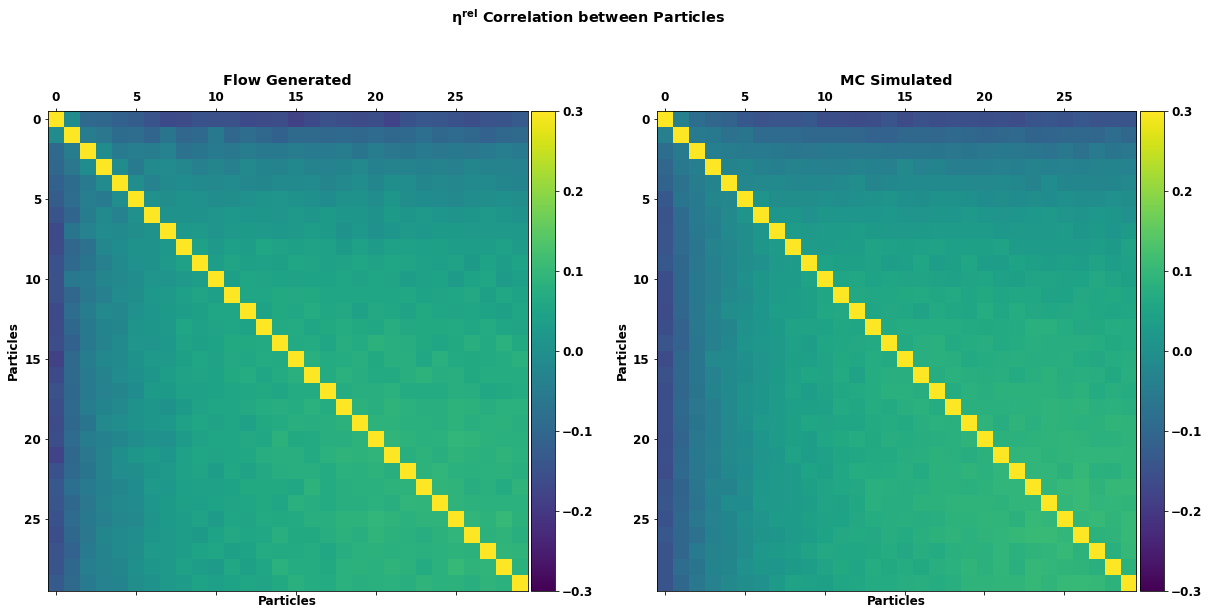

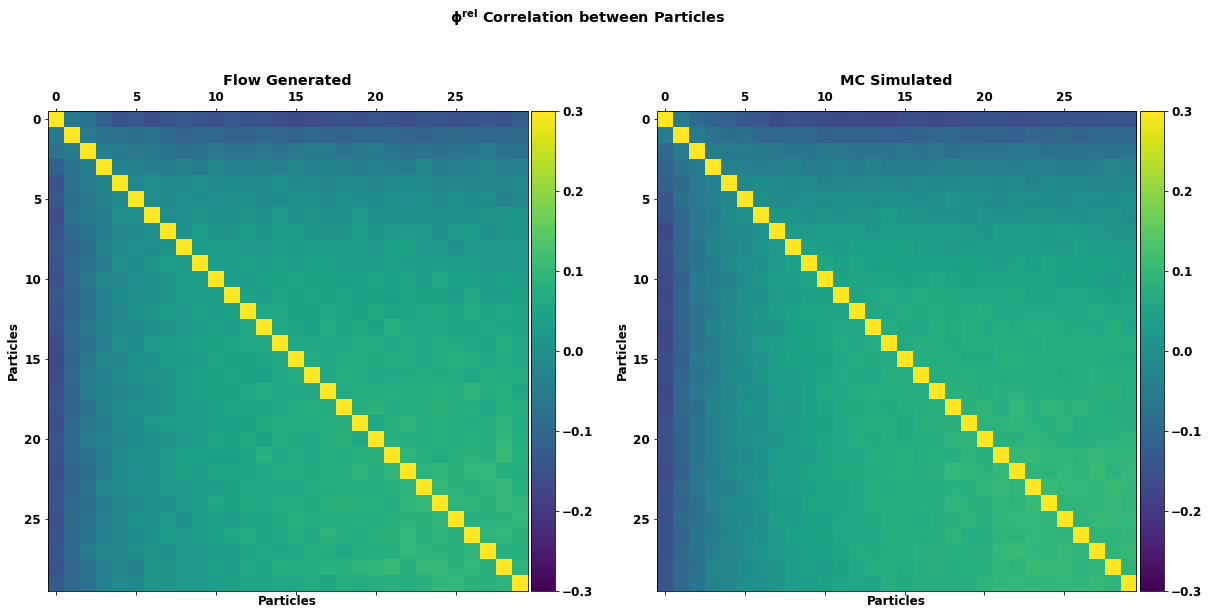

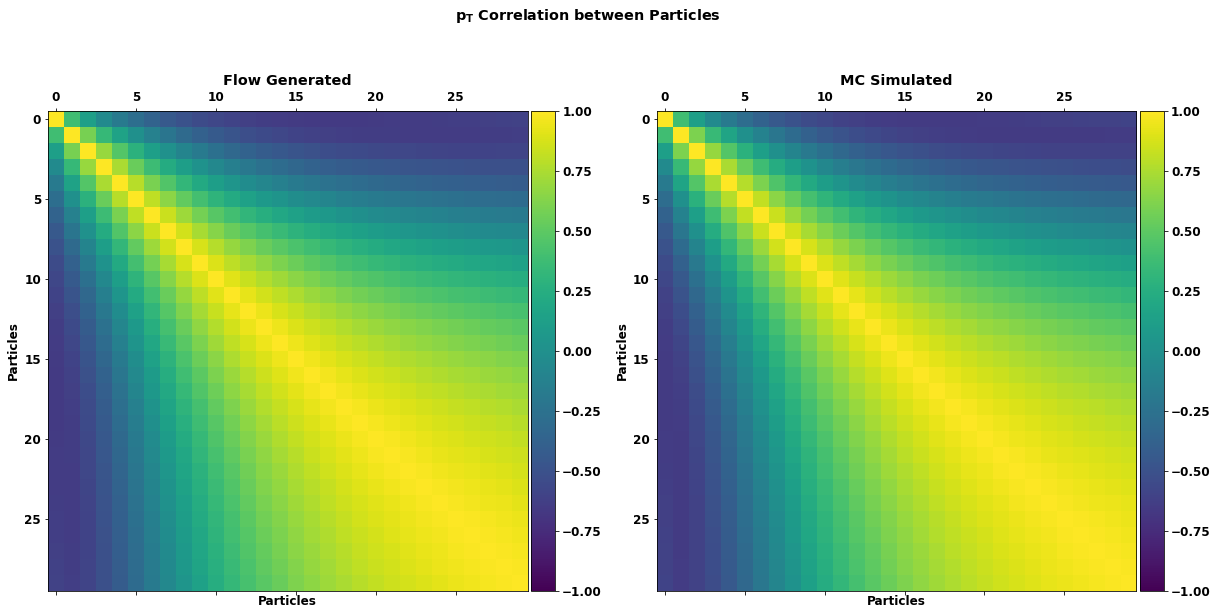

In [45]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.loggers import TensorBoardLogger
pl.seed_everything(42, workers=True)
with open("/beegfs/desy/user/kaechben/bestmodels/top_cc2_t/lightning_logs/version_12/hparams.yaml", 'r') as stream:
                        config=yaml.safe_load(stream)
data_module = JetNetDataloader(config) #this loads the data

model = LitNF(config,False) # the sets up the model,  config are hparams we want to optimize
# Callbacks to use during the training, we  checkpoint our models

model = model.load_from_checkpoint(checkpoint_dict["c2t"])
callbacks = [ModelCheckpoint(monitor="val_fpnd",save_top_k=50, filename='{epoch}-{val_logprob:.2f}-{val_w1m:.4f}-{val_w1efp:.6f}-{val_fpnd:.2f}',every_n_epochs=10) ]

# if True:#load_ckpt:
#     model = model.load_from_checkpoint("/beegfs/desy/user/kaechben/t/2022_06_22-10_50-16/epoch=1749-val_logprob=0.94-val_w1m=0.0153.ckpt")
model.load_datamodule(data_module)#adds datamodule to model
model.config = config #config are our hyperparams, we make this a class property now
model=model.eval()
data_module.setup("validation")          
batch=data_module.test_set
batch=batch[:,:model.n_dim+1]
data_module.setup("validation")
batch=data_module.test_set.to("cpu")
n_true=batch[:,-1]
#           
model.load_datamodule(data_module)#adds datamodule to model
c_test,n_test=model.test_cond(1*len(batch)) #this is the condition in the case of testing
test=torch.empty((0,91))
for i in range(1):
    with torch.no_grad():

        temp=model.flow_test.to("cuda").sample(1 ,c_test[(i)*len(batch):(i+1)*len(batch)].to("cuda")).to("cpu").reshape(-1,90)

        temp=torch.hstack((temp[:,:model.n_dim].cpu().detach().reshape(-1,model.n_dim),torch.ones(len(temp)).unsqueeze(1)))
        test=torch.vstack((test,temp))
# Reverse Standard Scaling (this has nothing to do with flows, it is a standard preprocessing step)
test=model.data_module.scaler.inverse_transform(test)
true=model.data_module.scaler.inverse_transform(batch[:,:model.n_dim+1])[:,:model.n_dim]
#We overwrite in cases where n is smaller 30 the particles after n with 0
if model.config["context_features"]>1:
    for i in torch.unique(c_test[:,-1]):
        i=int(i)
        test[c_test[:,-1]==i,3*i:-1]=0
#This is just a nice check to see whether we overtrain 
#             logprob = -model.flow.to("cpu").log_prob(batch[:,:model.n_dim],c).detach().mean().numpy()/model.n_dim
m_t=mass(true[:,:model.n_dim].to(model.device),model.config["canonical"]).cpu()
m_test=mass(test[:,:model.n_dim],model.config["canonical"]).cpu()
plot=plotting_paper(model=model,gen=test[:,:model.n_dim],true=true[:,:model.n_dim],config=model.config,step=model.global_step,typ=typ,c=c,p=p,logger=None)
# plot.oversample(weight=1/1000,m_test=m_test,m_t=m_t,save=False)
plot.plot_corr(i=0,save=False)
plot.plot_corr(i=1,save=False)            
plot.plot_corr(i=2,save=False)
# logger = TensorBoardLogger("/beegfs/desy/user/kaechben/top_finale")
# #log every n steps could be important as it decides how often it should log to tensorboard
# # Also check val every n epochs, as validation checking takes some time

# model.config["n_mse_turnoff"]=10000000
# print(model.config)
# trainer = pl.Trainer(gpus=1, logger=logger,  log_every_n_steps=10,  # auto_scale_batch_size="binsearch",
#                       max_steps=10000, callbacks=callbacks,
#                       check_val_every_n_epoch=10 ,num_sanity_val_steps=0,#gradient_clip_val=.02, gradient_clip_algorithm="norm",
#                      fast_dev_run=False,max_epochs=100,stochastic_weight_avg=True)
# # This calls the fit function which trains the model
# model.train()
# trainer.fit(model, train_dataloaders=data_module )  

In [43]:
model = LitNF(config,False) # the sets up the model,  config are hparams we want to optimize
# Callbacks to use during the training, we  checkpoint our models

model = model.load_from_checkpoint(checkpoint_dict["c2t"])
callbacks = [ModelCheckpoint(monitor="val_fpnd",save_top_k=50, filename='{epoch}-{val_logprob:.2f}-{val_w1m:.4f}-{val_w1efp:.6f}-{val_fpnd:.2f}',every_n_epochs=10) ]

# if True:#load_ckpt:
#     model = model.load_from_checkpoint("/beegfs/desy/user/kaechben/t/2022_06_22-10_50-16/epoch=1749-val_logprob=0.94-val_w1m=0.0153.ckpt")
model.load_datamodule(data_module)#adds datamodule to model
model.config = config #config are our hyperparams, we make this a class property now
model=model.eval()
data_module.setup("validation")          
batch=data_module.test_set
batch=batch[:,:model.n_dim+1]
data_module.setup("validation")
batch=data_module.test_set.to("cpu")
n_true=batch[:,-1]
import time
times=[]
model.flow_test.to("cuda")
cs=c_test[:10000].to("cuda")
with torch.no_grad():
    for i in range(100):
        start=time.time()
        temp=model.flow.sample(1 ,cs)
        times.append(time.time()-start)
times=np.array(times)
print(np.mean(times),np.std(times))

0.14316603660583496 0.0004945941909839898


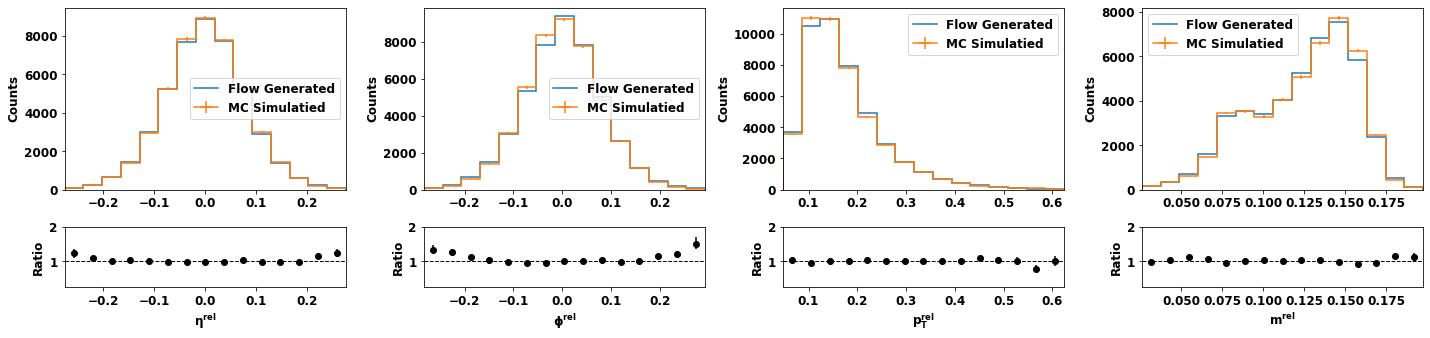

In [35]:
plot=plotting_paper(model=model,gen=test[:,:model.n_dim],true=true[:,:model.n_dim],config=model.config,step=model.global_step,typ=typ,c=c,p=p,logger=None)
plot.oversample(weight=1000,m=m_test,m_t=m_t,save=False)

In [24]:
test[c_test[:,-1]==29,:]

IndexError: The shape of the mask [45648000] at index 0 does not match the shape of the indexed tensor [4564800, 91] at index 0

In [41]:
import gc
del model
torch.cuda.empty_cache()
gc.collect()

85365

In [40]:
model=model.eval()
            
            
data_module.setup("validation")
batch=data_module.test_set.to("cpu")
n_true=batch[:,-1]
#           

c_test,n_test=model.test_cond(len(batch)) #this is the condition in the case of testing
with torch.no_grad():
    try:
        test=model.flow_test.to("cpu").sample(1 ,c_test.to("cpu")).to("cpu").reshape(-1,90)
    except:
        test=model.flow_test.to("cpu").sample(len(batch)).to("cpu").reshape(-1,90)
    test=torch.hstack((test[:,:model.n_dim].cpu().detach().reshape(-1,model.n_dim),torch.ones(len(test)).unsqueeze(1)))
# Reverse Standard Scaling (this has nothing to do with flows, it is a standard preprocessing step)
test=model.data_module.scaler.inverse_transform(test)
true=model.data_module.scaler.inverse_transform(batch[:,:model.n_dim+1])[:,:model.n_dim]
#We overwrite in cases where n is smaller 30 the particles after n with 0
if model.config["context_features"]>1:
    for i in torch.unique(c_test[:,-1]):
        i=int(i)
        test[c_test[:,-1]==i,3*i:-1]=0
#This is just a nice check to see whether we overtrain 
#             logprob = -model.flow.to("cpu").log_prob(batch[:,:model.n_dim],c).detach().mean().numpy()/model.n_dim
m_t=mass(true[:,:model.n_dim].to(model.device),model.config["canonical"]).cpu()
m_test=mass(test[:,:model.n_dim],model.config["canonical"]).cpu()
test=torch.column_stack((test[:,:90],m_test))       
# For one metric the pt needs to always be bigger or equal 0, so we overwrite the cases where it isnt (its not physical possible to ahve pt smaller 0)
for i in range(30):
    i=2+3*i
    test[test[:,i]<0,i]=0
    true[true[:,i]<0,i]=0
cov,mmd=cov_mmd(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3),use_tqdm=False)
try:
    fpndv=fpnd(test[:50000,:model.n_dim].reshape(-1,model.n_dim//3,3).numpy(),use_tqdm=False,jet_type=model.config["parton"],device="cuda", batch_size=25)
except:
    fpndv=1000
tempm=w1m(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3))
tempp=w1p(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3))
tempe=w1efp(test[:,:model.n_dim].reshape(-1,model.n_dim//3,3),true[:,:model.n_dim].reshape(-1,model.n_dim//3,3),)
results=pd.DataFrame([tempm[0],tempp[0],tempe[0],fpndv,cov,mmd,tempm[1],tempp[1],tempe[1]])
results=results.T
results.columns=["val_w1m","val_w1p","val_w1efp","fpnd","cov","mmd","pmm","pmp","pme"]
results["model"]=typ+str(c)+p
results_sum=results_sum.append(results)
print(results_sum)

/beegfs/desy/user/kaechben/.conda/envs/jetnet/lib/python3.8/site-packages/jetnet/evaluation/gen_metrics.py:239: RuntimeWarning: Recommended number of jets for FPND calculation is 50000
  warnings.warn(


    val_w1m   val_w1p  val_w1efp      fpnd    cov       mmd       pmm  \
0  0.006613  0.002090   0.000155  7.702451  0.580  0.070270  0.000271   
0  0.001128  0.000991   0.000029  2.651394  0.582  0.070381  0.000442   
0  0.000695  0.001625   0.000029  2.171526  0.567  0.069221  0.000279   
0  0.002797  0.001844   0.000018  1.409249  0.531  0.023375  0.000372   
0  0.000901  0.001240   0.000009  0.451015  0.540  0.024425  0.000044   
0  0.000628  0.004440   0.000009  0.692732  0.508  0.023854  0.000286   
0  0.004634  0.002006   0.000037  1.775104  0.562  0.034644  0.000407   
0  0.001429  0.000530   0.000007  0.544469  0.550  0.035455  0.000334   
0  0.000891  0.001130   0.000011  0.317239  0.528  0.034787  0.000222   
0  0.001007  0.003847   0.000055  5.907087  0.538  0.072554  0.000381   
0  0.000891  0.001523   0.000039  2.307313  0.571  0.071852  0.000255   
0  0.000711  0.000827   0.000007  0.593187  0.497  0.023677  0.000222   
0  0.000838  0.004391   0.000010  1.190638  0.492  

/tmp/ipykernel_30740/923908571.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_sum=results_sum.append(results)


In [41]:
results

,val_w1m,val_w1p,val_w1efp,fpnd,cov,mmd,pmm,pmp,pme,model
0,0.003181,0.004613,0.000059,4.504313,0.556,0.070648,0.000123,0.000689,0.000015,cc2g


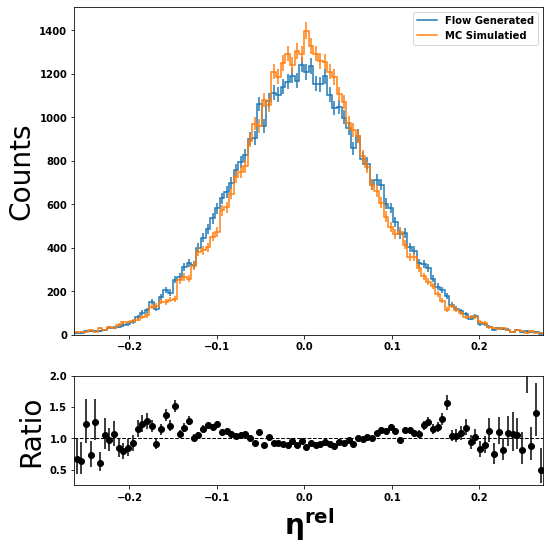

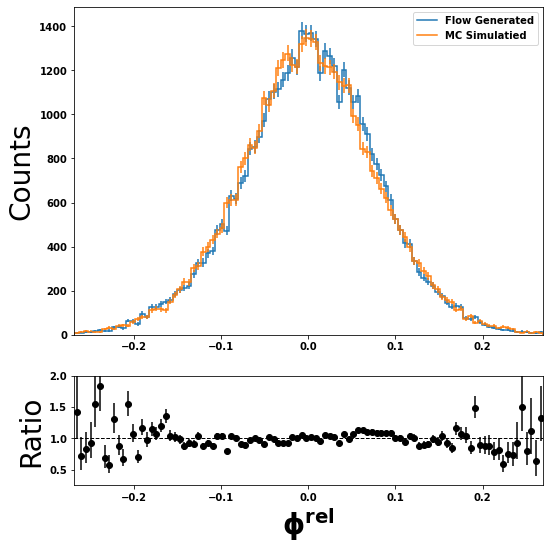

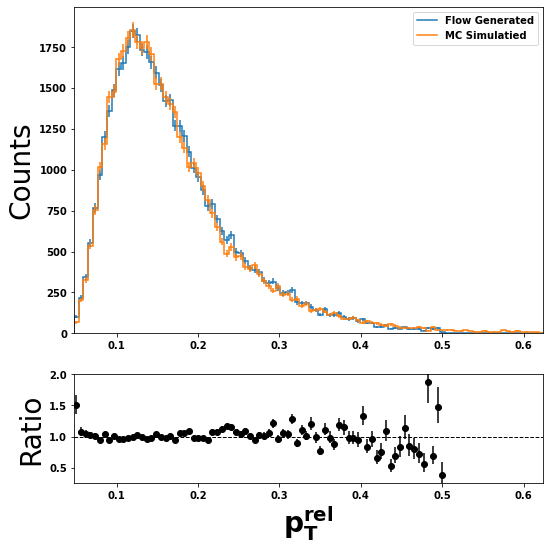

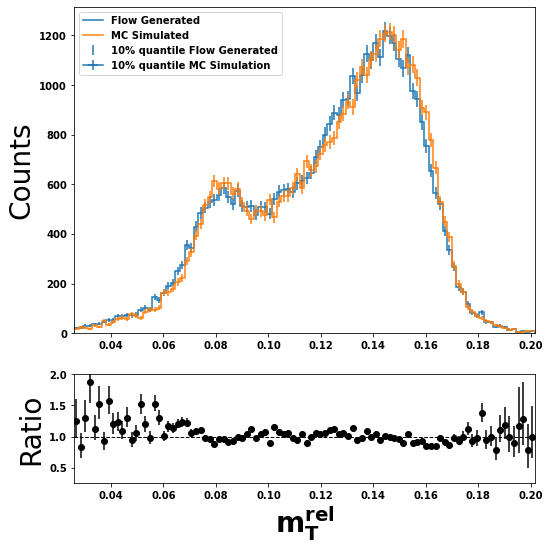

In [121]:
%matplotlib inline
model.plot=plotting(model=model,gen=test[:,:model.n_dim],true=true[:,:model.n_dim],config=model.config,step=model.global_step)
#,typ="100",c="bins",p="top"
# model.plot.plot_marginals(ith=7,save=False,title="Marginal Distributions, top-quark Dataset")
model.plot.plot_mass(m_test.cpu().numpy(),m_t.cpu().numpy(),save=False,bins=100,quantile=False)
# model.plot.var_part(true=true[:,:model.n_dim],gen=test[:,:model.n_dim],true_n=n_true,gen_n=n_test,m_true=m_t,m_gen=m_test ,save=False)


# print(len(true))

[4, 3, 2, 1]